## RQ1.Was there a change in student performance during the pandemic?

## RQ2.Was school performance the same for elementary school and high school during the pandemic?

In [59]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as tkr
import locale
%matplotlib inline
locale.setlocale(locale.LC_ALL, '')

'Portuguese_Brazil.1252'

In [60]:
# Constants
x_2020_shift = 0.13
y_2020_shift = 0.15
markersize=9

x_shift = 0.05
y_shift = 0.8
y_2010_shift = 0.5
y_2013_shift = 0.5
y_2015_shift = 0.5
y_2017_shift = 0.5

In [61]:
def printLabelsOnTopWithoutPercentage(barplot, shift):

    for p in barplot.patches:
        barplot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + shift + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0,9), 
                   textcoords = 'offset points')

In [62]:
def printLabelsOnTop(barplot, shift):

    for p in barplot.patches:
        barplot.annotate(format(p.get_height(), '.1f')+ '%', 
                   (p.get_x() + shift + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0,9), 
                   textcoords = 'offset points')


In [63]:
def plot_pandemic_value(data, column):
    y_2020_EF = data[data['Ano']==2020][column].iloc[0]
    plt.text(2020+x_2020_shift, y_2020_EF-y_2020_shift, '{:.1f}%'.format(y_2020_EF), color='white').set_backgroundcolor('#965786')

In [64]:
def plot_mean(dataset, mean, label, colorText, colorBackground):
    plt.axhline(y=mean, label=label, color=colorBackground, linestyle='--')
    plt.text(2020+x_2020_shift, mean-y_2020_shift, '{:.1f}%'.format(mean), color=colorText).set_backgroundcolor(colorBackground)

In [65]:
def formatador_de_milhares(x, pos):
    return locale.format_string('%.0f', x, True)

In [66]:
def printLabelsOnLineplot(plot, dataset, data_plot):
    for i in range(len(dataset.Ano)):
        ano = dataset['Ano'][i]
        text_color = 'black'
        background_color = 'None'
        if(ano == 2020):
            x_shift = 0.13
            text_color = 'white'
            background_color = '#965786'
        d = dataset[dataset['Ano']==ano][data_plot].iloc[0]
        plt.text(ano+x_shift, d-y_shift, '{:.1f}%'.format(d), color=text_color).set_backgroundcolor(background_color)

In [67]:
total_matriculas = pd.read_csv('data/numero_de_matriculas.csv')
total_matriculas

,Ano,Número de Matrículas
0,2007,47295294
1,2008,47874246
2,2009,48455867
3,2010,48608093
4,2011,48817479
5,2012,48796512
6,2013,49771371
7,2014,50042448
8,2015,50545050
9,2016,50972619


### number of enrollments in Basic Education from 2007 - 2020

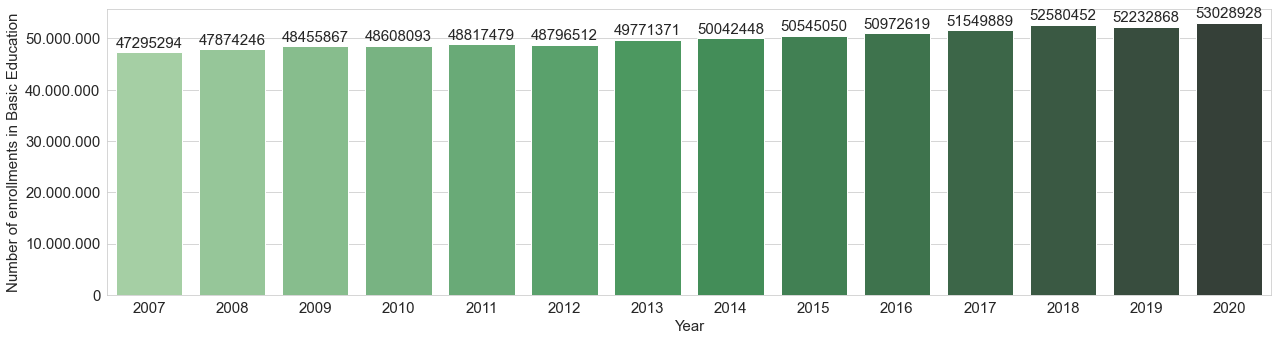

In [132]:
plt.figure(figsize=(18, 5))
ax = barplot = sns.barplot(x=total_matriculas['Ano'], y=total_matriculas['Número de Matrículas'], palette="Greens_d")
printLabelsOnTopWithoutPercentage(barplot,0)
ax.yaxis.set_major_formatter(tkr.FuncFormatter(formatador_de_milhares))
plt.tight_layout()
plt.xlabel("Year")
plt.ylabel("Number of enrollments in Basic Education")
# plt.axvline(x=12.5, label="Beginning of the Pandemic", color="red", linestyle='-')
plt.rcParams.update({'font.size': 15})
sns.color_palette("Blues", as_cmap=True)
# plt.legend()
plt.show()

In [69]:
# sns.set_style("whitegrid")
# plt.figure(figsize=(15,7))
# ax.set(xticks=total_matriculas.Ano.values)
# plt.figure(figsize=(20, 7))
# # plt.subplot(1, 2, 1)
# ax = sns.lineplot(data=total_matriculas, x='Ano', y='Número de Matrículas', marker='s', color="green")
# ax.yaxis.set_major_formatter(tkr.FuncFormatter(formatador_de_milhares))
# plt.tight_layout()
# plt.xlabel("Year")
# plt.ylabel("Number of enrollments in Basic Education")
# plt.axvline(x=2020.02, label="Beginning of the Pandemic", color="red", linestyle='-')
# printLabelsOnLineplot(ax, total_matriculas, 'Número de Matrículas')
# plt.rcParams.update({'font.size': 16})
# sns.color_palette("Blues", as_cmap=True)
# plt.legend()
# plt.show()

In [70]:
data = pd.read_csv('data/EF_EM_rede_localizacao_total.csv')
data

,Ano,Localização,Rede,Total - EF,1EF,2EF,3EF,4EF,5EF,6EF,7EF,8EF,9EF,Total - EM,1EM,2EM,3EM,4EM,Não-Seriado
0,2020,Total,Total,98.2,98.3,98.6,98.4,98.7,98.5,97.6,97.7,97.9,97.8,95.0,94.1,95.8,95.5,85.7,91.2
1,2019,Total,Total,92.8,98.5,97.5,91.4,94.1,94.7,87.9,89.1,91.0,92.3,86.1,80.5,87.3,92.5,88.9,85.1
2,2018,Total,Total,91.5,98.1,97.4,89.9,92.9,93.6,85.8,87.1,89.3,90.6,83.4,76.7,85.0,90.5,87.6,81.0
3,2017,Total,Total,91.0,98.0,97.2,89.5,92.8,93.1,84.5,86.5,88.7,89.6,83.1,76.4,84.7,90.5,85.2,84.5
4,2016,Total,Total,89.8,97.8,96.9,88.4,91.7,92.0,82.8,84.9,86.8,88.3,81.5,74.1,83.2,89.7,86.0,84.7
5,2015,Total,Total,89.9,97.7,96.8,88.5,91.7,92.1,82.9,84.6,87.3,88.6,81.7,74.6,83.6,89.5,87.7,84.2
6,2014,Total,Total,89.2,97.5,96.3,87.8,91.2,91.7,81.6,84.2,86.4,87.5,80.3,73.5,81.9,88.4,87.8,84.5
7,2013,Total,Total,89.3,97.4,95.8,88.5,91.6,91.2,82.2,84.5,86.8,87.6,80.1,73.2,82.0,88.0,88.0,83.1
8,2012,Total,Total,88.2,96.8,93.7,87.6,90.7,90.8,80.9,83.5,86.2,86.4,78.7,71.6,80.4,86.8,89.9,82.5
9,2011,Total,Total,87.6,96.5,91.9,87.1,90.9,90.5,80.1,83.4,85.2,85.5,77.4,70.2,79.4,85.5,88.3,79.4


In [71]:
data.Ano.unique()

array([2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010,
       2009, 2008, 2007], dtype=int64)

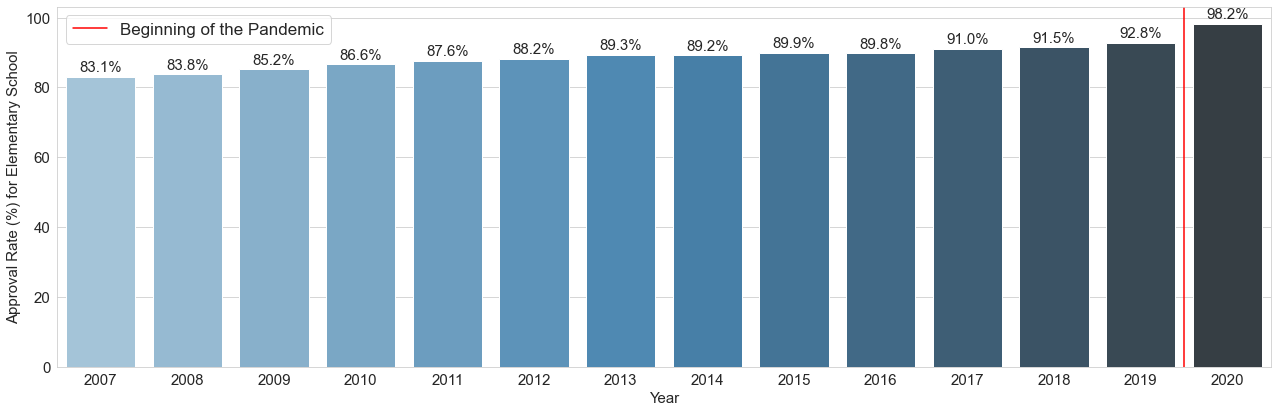

In [72]:
plt.figure(figsize=(18, 6))

# plt.subplot(1, 2, 1)

barplot = sns.barplot(x=data['Ano'], y=data['Total - EF'], palette="Blues_d")
printLabelsOnTop(barplot,0)

# ax.yaxis.set_major_formatter(tkr.FuncFormatter(formatador_de_milhares))
plt.tight_layout()

plt.xlabel("Year")
plt.ylabel("Approval Rate (%) for Elementary School")
plt.axvline(x=12.5, label="Beginning of the Pandemic", color="red", linestyle='-')

plt.rcParams.update({'font.size': 17})
sns.color_palette("Blues", as_cmap=True)
plt.legend()
plt.show()

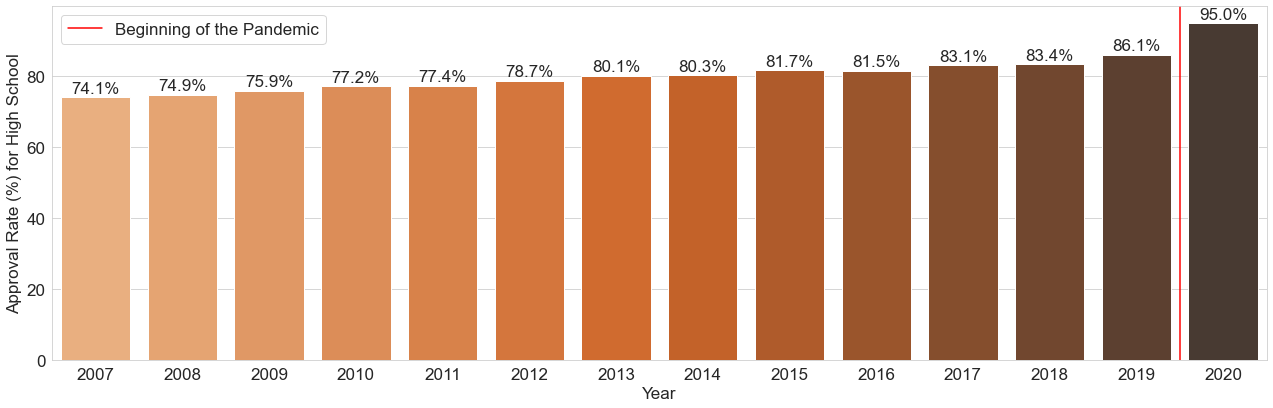

In [73]:
plt.figure(figsize=(18, 6))

# plt.subplot(1, 2, 1)
barplot = sns.barplot(x=data['Ano'], y=data['Total - EM'], palette="Oranges_d")
printLabelsOnTop(barplot,0)

# ax.yaxis.set_major_formatter(tkr.FuncFormatter(formatador_de_milhares))
plt.tight_layout()

plt.xlabel("Year")
plt.ylabel("Approval Rate (%) for High School")
plt.axvline(x=12.5, label="Beginning of the Pandemic", color="red", linestyle='-')
plt.rcParams.update({'font.size': 17})
plt.legend()
plt.show()

In [74]:
data

,Ano,Localização,Rede,Total - EF,1EF,2EF,3EF,4EF,5EF,6EF,7EF,8EF,9EF,Total - EM,1EM,2EM,3EM,4EM,Não-Seriado
0,2020,Total,Total,98.2,98.3,98.6,98.4,98.7,98.5,97.6,97.7,97.9,97.8,95.0,94.1,95.8,95.5,85.7,91.2
1,2019,Total,Total,92.8,98.5,97.5,91.4,94.1,94.7,87.9,89.1,91.0,92.3,86.1,80.5,87.3,92.5,88.9,85.1
2,2018,Total,Total,91.5,98.1,97.4,89.9,92.9,93.6,85.8,87.1,89.3,90.6,83.4,76.7,85.0,90.5,87.6,81.0
3,2017,Total,Total,91.0,98.0,97.2,89.5,92.8,93.1,84.5,86.5,88.7,89.6,83.1,76.4,84.7,90.5,85.2,84.5
4,2016,Total,Total,89.8,97.8,96.9,88.4,91.7,92.0,82.8,84.9,86.8,88.3,81.5,74.1,83.2,89.7,86.0,84.7
5,2015,Total,Total,89.9,97.7,96.8,88.5,91.7,92.1,82.9,84.6,87.3,88.6,81.7,74.6,83.6,89.5,87.7,84.2
6,2014,Total,Total,89.2,97.5,96.3,87.8,91.2,91.7,81.6,84.2,86.4,87.5,80.3,73.5,81.9,88.4,87.8,84.5
7,2013,Total,Total,89.3,97.4,95.8,88.5,91.6,91.2,82.2,84.5,86.8,87.6,80.1,73.2,82.0,88.0,88.0,83.1
8,2012,Total,Total,88.2,96.8,93.7,87.6,90.7,90.8,80.9,83.5,86.2,86.4,78.7,71.6,80.4,86.8,89.9,82.5
9,2011,Total,Total,87.6,96.5,91.9,87.1,90.9,90.5,80.1,83.4,85.2,85.5,77.4,70.2,79.4,85.5,88.3,79.4


In [75]:
data['Total - EF']

0     98.2
1     92.8
2     91.5
3     91.0
4     89.8
5     89.9
6     89.2
7     89.3
8     88.2
9     87.6
10    86.6
11    85.2
12    83.8
13    83.1
Name: Total - EF, dtype: float64

In [76]:
data['Total - EM']

0     95.0
1     86.1
2     83.4
3     83.1
4     81.5
5     81.7
6     80.3
7     80.1
8     78.7
9     77.4
10    77.2
11    75.9
12    74.9
13    74.1
Name: Total - EM, dtype: float64

### The mean Approval Rate (AR) for Elementary School (ES)

In [77]:
mean_ES = data['Total - EF'][1:14].sum()/13
print(mean_ES)

88.3076923076923


89.46923076923078

### The mean Approval Rate (AR) for High School (HS)

In [78]:
mean_HS = data['Total - EM'][1:14].sum()/13
print(mean_HS)

79.56923076923077


81.17692307692309

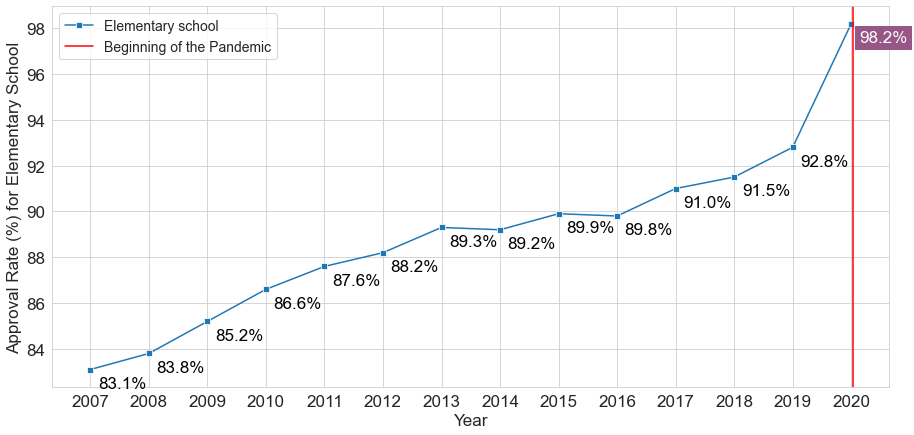

In [79]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,7))
# plt.title("Elementary School Approval Rate before and during the COVID-19 Pandemic")
ax = sns.lineplot(data=data, x='Ano', y='Total - EF', label="Elementary school",marker='s')
ax.set(xticks=data.Ano.values)
printLabelsOnLineplot(ax, data, 'Total - EF')
plt.rcParams.update({'font.size': 13})
plt.xlabel("Year")
plt.ylabel("Approval Rate (%) for Elementary School")
plt.axvline(x=2020.025, label="Beginning of the Pandemic", color="red", linestyle='-')
plt.rcParams.update({'font.size': 14})
plt.legend()
plt.show()

### Plotting visualizations for Approval Rate before and during the Pandemic (2007-2020)

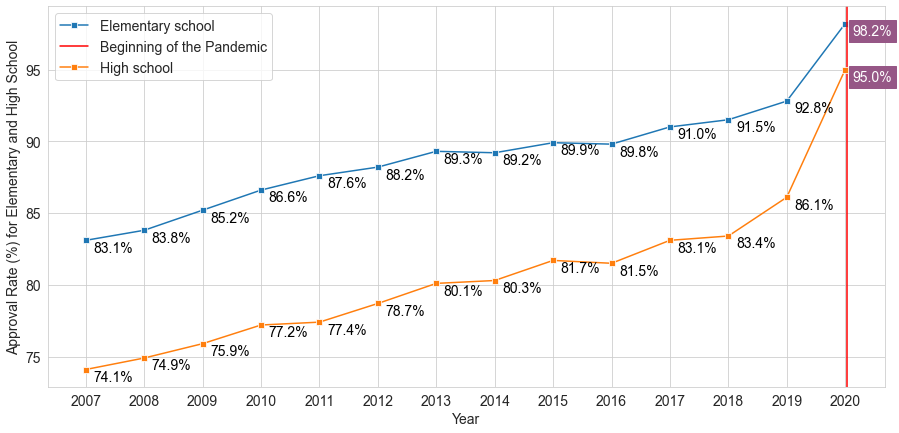

In [80]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,7))
ax_es = sns.lineplot(data=data, x='Ano', y='Total - EF', label="Elementary school",marker='s')
ax_es.set(xticks=data.Ano.values)
printLabelsOnLineplot(ax_es, data, 'Total - EF')
plt.rcParams.update({'font.size': 13})
plt.xlabel("Year")
plt.ylabel("Approval Rate (%) for Elementary and High School")
plt.axvline(x=2020.025, label="Beginning of the Pandemic", color="red", linestyle='-')
plt.rcParams.update({'font.size': 14})
ax_hs = sns.lineplot(data=data, x='Ano', y='Total - EM', label="High school",marker='s')
ax_hs.set(xticks=data.Ano.values)
printLabelsOnLineplot(ax_hs, data, 'Total - EM')
plt.legend()
plt.show()

## Before the Pandemic

### The School Performance Rate (SPR) for Elementary School (ES) has been higher than the school performance rate for High School (HS) since 2007. Even before the Pandemic, the mean SPR for ES was higher (89.01%) than the mean SPR for HS (80.67%).

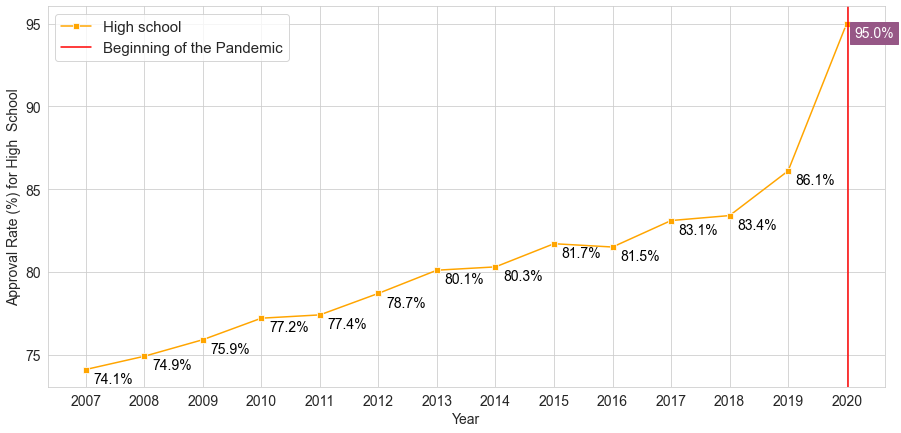

In [81]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,7))
# plt.title("High School Approval Rate before and during the COVID-19 Pandemic")
ax = sns.lineplot(data=data, x='Ano', y='Total - EM', label="High school", marker='s', color="orange")
printLabelsOnLineplot(ax, data, 'Total - EM')
ax.set(xticks=data.Ano.values)
plt.xlabel("Year")
plt.ylabel("Approval Rate (%) for High  School")
plt.axvline(x=2020.025, label="Beginning of the Pandemic", color="red", linestyle='-')
plt.rcParams.update({'font.size': 15})
plt.legend()
plt.show()

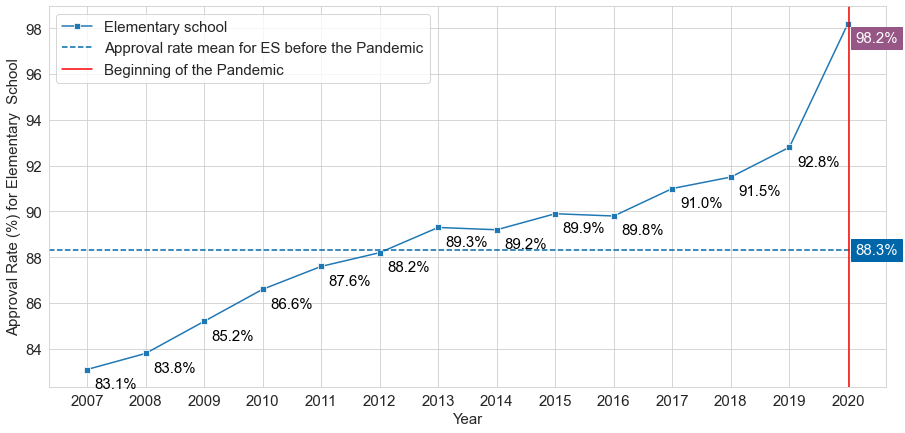

In [82]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,7))
# plt.title("High School Approval Rate before and during the COVID-19 Pandemic")
ax = sns.lineplot(data=data, x='Ano', y='Total - EF', label="Elementary school", marker='s')
printLabelsOnLineplot(ax, data, 'Total - EF')
ax.set(xticks=data.Ano.values)
plt.axhline(y=mean_ES, label="Approval rate mean for ES before the Pandemic", color='#0066aa', linestyle='--')
plt.text(2020+x_2020_shift, mean_ES-y_2020_shift, '{:.1f}%'.format(mean_ES), color='white').set_backgroundcolor('#0066aa')
plt.xlabel("Year")
plt.ylabel("Approval Rate (%) for Elementary  School")
plt.axvline(x=2020.025, label="Beginning of the Pandemic", color="red", linestyle='-')
plt.rcParams.update({'font.size': 15})
plt.legend()
plt.show()

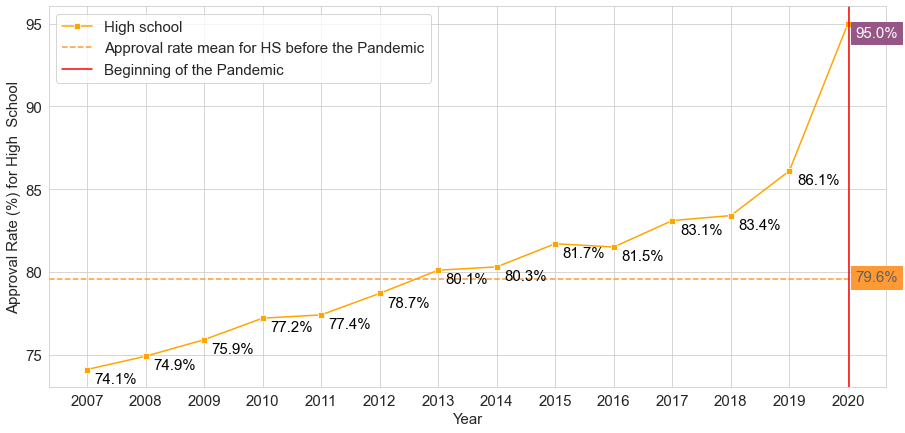

In [83]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,7))
# plt.title("High School Approval Rate before and during the COVID-19 Pandemic")
ax = sns.lineplot(data=data, x='Ano', y='Total - EM', label="High school", marker='s', color="orange")
printLabelsOnLineplot(ax, data, 'Total - EM')
ax.set(xticks=data.Ano.values)
plt.axhline(y=mean_HS, label="Approval rate mean for HS before the Pandemic", color='#ff9933', linestyle='--')
plt.text(2020+x_2020_shift, mean_HS-y_2020_shift, '{:.1f}%'.format(mean_HS), color='#606060').set_backgroundcolor('#ff9933')
plt.xlabel("Year")
plt.ylabel("Approval Rate (%) for High  School")
plt.axvline(x=2020.025, label="Beginning of the Pandemic", color="red", linestyle='-')
plt.rcParams.update({'font.size': 15})
plt.legend()
plt.show()

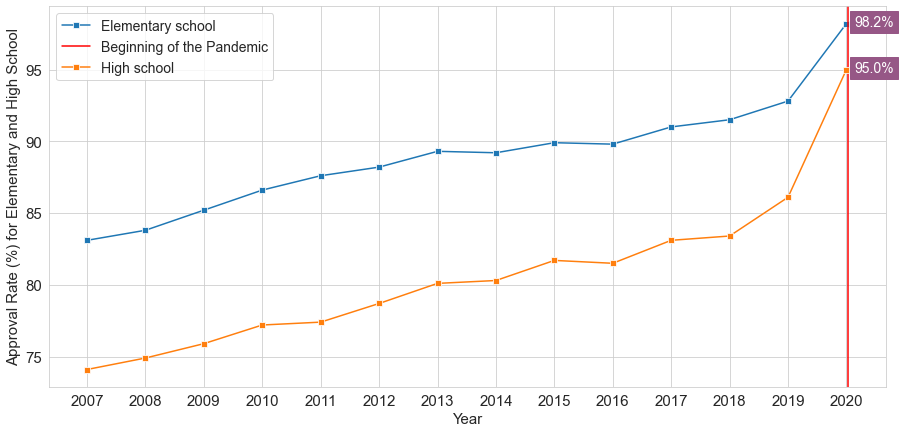

In [84]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,7))
ax_es = sns.lineplot(data=data, x='Ano', y='Total - EF', label="Elementary school",marker='s')
ax_es.set(xticks=data.Ano.values)
plt.rcParams.update({'font.size': 13})
plt.xlabel("Year")
plt.ylabel("Approval Rate (%) for Elementary and High School")
plt.axvline(x=2020.025, label="Beginning of the Pandemic", color="red", linestyle='-')
plt.rcParams.update({'font.size': 14})
ax_hs = sns.lineplot(data=data, x='Ano', y='Total - EM', label="High school",marker='s')
ax_hs.set(xticks=data.Ano.values)
plot_pandemic_value(data, 'Total - EF')
plot_pandemic_value(data, 'Total - EM')
plt.legend()
plt.show()


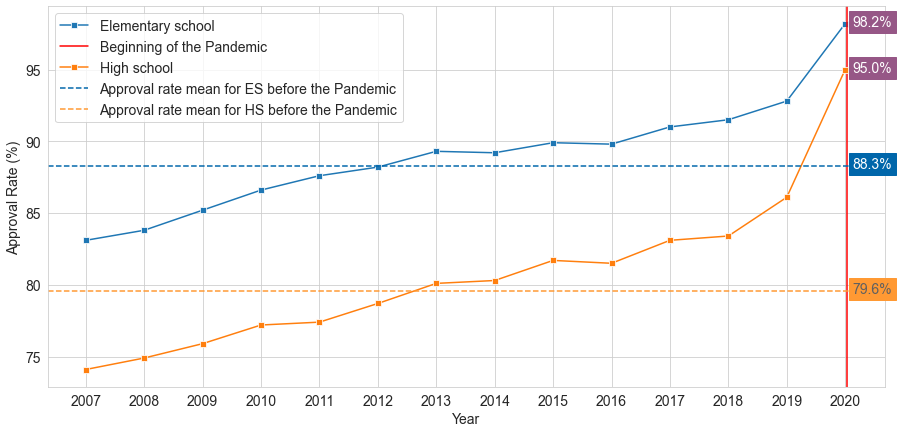

In [85]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,7))
ax_es = sns.lineplot(data=data, x='Ano', y='Total - EF', label="Elementary school",marker='s')
ax_es.set(xticks=data.Ano.values)
plt.rcParams.update({'font.size': 13})
plt.xlabel("Year")
plt.ylabel("Approval Rate (%)")
plt.axvline(x=2020.025, label="Beginning of the Pandemic", color="red", linestyle='-')
plt.rcParams.update({'font.size': 14})
ax_hs = sns.lineplot(data=data, x='Ano', y='Total - EM', label="High school",marker='s')
ax_hs.set(xticks=data.Ano.values)
plot_pandemic_value(data, 'Total - EF')
plot_pandemic_value(data, 'Total - EM')
# plot_mean(data, mean_ES, 'Approval rate mean for ES before the Pandemic', 'white', '#006633')
# plot_mean(data, mean_HS, 'Approval rate mean for HS before the Pandemic', '#606060', '#00CC33')
plot_mean(data, mean_ES, 'Approval rate mean for ES before the Pandemic', 'white', '#0066aa')
plot_mean(data, mean_HS, 'Approval rate mean for HS before the Pandemic', '#606060', '#ff9933')
plt.legend()
plt.show()


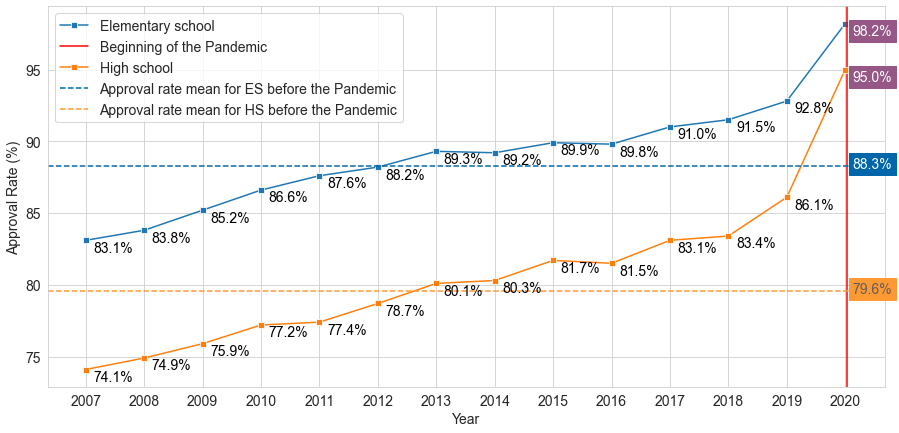

In [86]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,7))
ax_es = sns.lineplot(data=data, x='Ano', y='Total - EF', label="Elementary school",marker='s')
ax_es.set(xticks=data.Ano.values)
printLabelsOnLineplot(ax_es, data, 'Total - EF')
plt.rcParams.update({'font.size': 13})
plt.xlabel("Year")
plt.ylabel("Approval Rate (%)")
plt.axvline(x=2020.025, label="Beginning of the Pandemic", color="red", linestyle='-')
plt.rcParams.update({'font.size': 14})
ax_hs = sns.lineplot(data=data, x='Ano', y='Total - EM', label="High school",marker='s')
ax_hs.set(xticks=data.Ano.values)
printLabelsOnLineplot(ax_hs, data, 'Total - EM')
plot_mean(data, mean_ES, 'Approval rate mean for ES before the Pandemic', 'white', '#0066aa')
plot_mean(data, mean_HS, 'Approval rate mean for HS before the Pandemic', '#606060', '#ff9933')
plt.legend()
plt.show()

In [87]:
# sns.set_style("white")
# plt.figure(figsize=(15,7))
# sns.regplot(data=data, x='Ano', y='Total - EF', label="Elementary School (ES)")
# ax = sns.regplot(data=data, x='Ano', y='Total - EM', label="High School (HS)")
# ax.set(xticks=data.Ano.values)
# plt.xlabel("Year")
# plt.ylabel("School Performance Rate (%)")

# y_2020_EM = data[data['Ano']==2020]['Total - EM'].iloc[0]
# plt.text(2020+x_shift, y_2020_EM-y_shift, '{:.1f}%'.format(y_2020_EM), color='white').set_backgroundcolor('#965786')
# y_2020_EF = data[data['Ano']==2020]['Total - EF'].iloc[0]
# plt.text(2020+x_shift, y_2020_EF-y_shift, '{:.1f}%'.format(y_2020_EF), color='white').set_backgroundcolor('#965786')

# plt.axhline(y=y_2020_EM, label="SPR for ES during Pandemic", color='purple', linestyle='-')
# plt.axhline(y=y_2020_EF, label="SPR for HS during Pandemic", color='black', linestyle='-')

# plt.text(2020+x_2020_shift, mean_ES-y_2020_shift, '{:.1f}%'.format(y_2020_EM), color='white').set_backgroundcolor('#965786')
# plt.text(2020+x_2020_shift, mean_HS-y_2020_shift, '{:.1f}%'.format(y_2020_EF), color='white').set_backgroundcolor('#965786')

# plt.axvline(x=2020.025, label="Beginning of the Pandemic", color='red', linestyle='-')
# plt.title("School Performance Rate before and during the COVID-19 Pandemic")

# plt.rcParams.update({'font.size': 15})

# plt.legend()
# plt.show()

## During the Pandemic

### The 2020 School Census data shows relevant particularities due to the COVID-19 pandemic, meaning that there was a change in student performance during the pandemic.

### As we can see from the visualization above, during the Pandemic, the SPR was not the same for Elementary School (ES) and High School (HS). The SPR for ES continued higher (98.2%) than the SPR for HS (95%).

### Nonetheless, still considering the Pandemic, both SPR for ES and HS had increased from the previous year (2019). In ES, the SPR increased 5.8% (from 92.8% to 98.2%), while in HS, the SPR increase was equivalent to 8.9% (from 86.1% to 95%).

### As a result of the Pandemic, the High School showed an unusual growth in the number of approved students, compared to what occurred in other years.

### One explanation for the increase of SPR in ES and HS is related to the fact that the Education managing entities recommended that the schools adjust the criteria for evaluating students considering the learning objectives effectively fulfilled, minimizing retention and school dropout.

### With the implementation of this strategy, many schools transferred to 2021 the challenge of fulfilling in integrality the learning objectives proposed by the National Common Curriculum Base (BNCC). In this case, schools did not retain students, given all the difficulties, and posponed the achievement of these goals to the 2021 year.


In [88]:

EF_EM_rede_localizacao_total = pd.read_csv('data/EF_EM_rede_localizacao_total.csv')
EF_EM_rede_localizacao_total 

,Ano,Localização,Rede,Total - EF,1EF,2EF,3EF,4EF,5EF,6EF,7EF,8EF,9EF,Total - EM,1EM,2EM,3EM,4EM,Não-Seriado
0,2020,Total,Total,98.2,98.3,98.6,98.4,98.7,98.5,97.6,97.7,97.9,97.8,95.0,94.1,95.8,95.5,85.7,91.2
1,2019,Total,Total,92.8,98.5,97.5,91.4,94.1,94.7,87.9,89.1,91.0,92.3,86.1,80.5,87.3,92.5,88.9,85.1
2,2018,Total,Total,91.5,98.1,97.4,89.9,92.9,93.6,85.8,87.1,89.3,90.6,83.4,76.7,85.0,90.5,87.6,81.0
3,2017,Total,Total,91.0,98.0,97.2,89.5,92.8,93.1,84.5,86.5,88.7,89.6,83.1,76.4,84.7,90.5,85.2,84.5
4,2016,Total,Total,89.8,97.8,96.9,88.4,91.7,92.0,82.8,84.9,86.8,88.3,81.5,74.1,83.2,89.7,86.0,84.7
5,2015,Total,Total,89.9,97.7,96.8,88.5,91.7,92.1,82.9,84.6,87.3,88.6,81.7,74.6,83.6,89.5,87.7,84.2
6,2014,Total,Total,89.2,97.5,96.3,87.8,91.2,91.7,81.6,84.2,86.4,87.5,80.3,73.5,81.9,88.4,87.8,84.5
7,2013,Total,Total,89.3,97.4,95.8,88.5,91.6,91.2,82.2,84.5,86.8,87.6,80.1,73.2,82.0,88.0,88.0,83.1
8,2012,Total,Total,88.2,96.8,93.7,87.6,90.7,90.8,80.9,83.5,86.2,86.4,78.7,71.6,80.4,86.8,89.9,82.5
9,2011,Total,Total,87.6,96.5,91.9,87.1,90.9,90.5,80.1,83.4,85.2,85.5,77.4,70.2,79.4,85.5,88.3,79.4


In [89]:
data_barplot_approval = EF_EM_rede_localizacao_total[['Ano','Total - EF', 'Total - EM']]
data_barplot_approval

,Ano,Total - EF,Total - EM
0,2020,98.2,95.0
1,2019,92.8,86.1
2,2018,91.5,83.4
3,2017,91.0,83.1
4,2016,89.8,81.5
5,2015,89.9,81.7
6,2014,89.2,80.3
7,2013,89.3,80.1
8,2012,88.2,78.7
9,2011,87.6,77.4


In [90]:
data_barplot_approval_es = data_barplot_approval[['Ano', 'Total - EF']].reset_index(drop=True)
data_barplot_approval_es['Level'] = 'Elementary School'
data_barplot_approval_es.rename(columns={'Ano': 'Year', 'Total - EF': 'Fail'}, inplace=True)
data_barplot_approval_es

,Year,Fail,Level
0,2020,98.2,Elementary School
1,2019,92.8,Elementary School
2,2018,91.5,Elementary School
3,2017,91.0,Elementary School
4,2016,89.8,Elementary School
5,2015,89.9,Elementary School
6,2014,89.2,Elementary School
7,2013,89.3,Elementary School
8,2012,88.2,Elementary School
9,2011,87.6,Elementary School


In [91]:
data_barplot_approval_hs = data_barplot_approval[['Ano', 'Total - EM']].reset_index(drop=True)
data_barplot_approval_hs['Level'] = 'High School'
data_barplot_approval_hs.rename(columns={'Ano': 'Year', 'Total - EM': 'Fail'}, inplace=True)
data_barplot_approval_hs

,Year,Fail,Level
0,2020,95.0,High School
1,2019,86.1,High School
2,2018,83.4,High School
3,2017,83.1,High School
4,2016,81.5,High School
5,2015,81.7,High School
6,2014,80.3,High School
7,2013,80.1,High School
8,2012,78.7,High School
9,2011,77.4,High School


In [92]:
data_barplot_approval_es_hs = pd.concat([data_barplot_approval_es, data_barplot_approval_hs])
data_barplot_approval_es_hs

,Year,Fail,Level
0,2020,98.2,Elementary School
1,2019,92.8,Elementary School
2,2018,91.5,Elementary School
3,2017,91.0,Elementary School
4,2016,89.8,Elementary School
5,2015,89.9,Elementary School
6,2014,89.2,Elementary School
7,2013,89.3,Elementary School
8,2012,88.2,Elementary School
9,2011,87.6,Elementary School


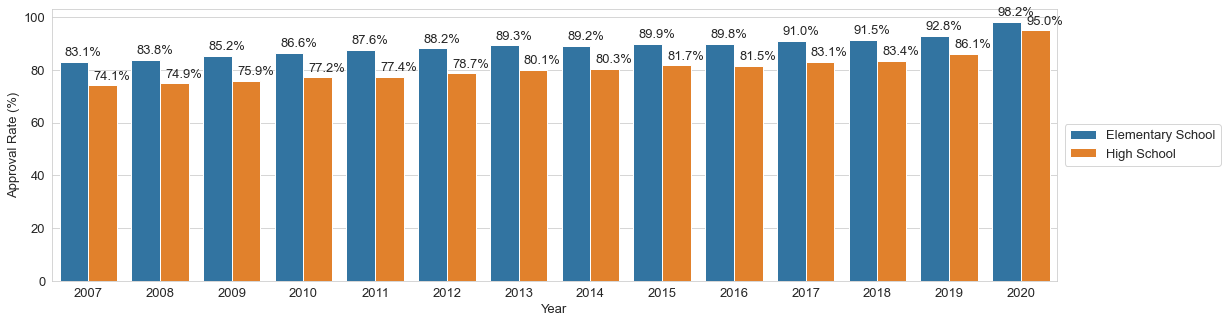

In [126]:
plt.figure(figsize=(18, 5))
barplot = sns.barplot(x=data_barplot_approval_es_hs['Year'], y=data_barplot_approval_es_hs['Fail'], hue=data_barplot_approval_es_hs['Level'])
printLabelsOnTop(barplot, 0.13)  

plt.ylabel('Approval Rate (%)')
plt.rcParams.update({'font.size': 13})
plt.legend(loc="right", bbox_to_anchor=(1.17, 0.5), ncol=1)
plt.show()

## Analysis for school failure rates

In [94]:
fail_data = pd.read_csv('data/fail_rate_analysis_rede_localizacao_total.csv')
fail_data

,Ano,Localização,Rede,R_EF_Total,R1EF,R2EF,R3EF,4REF,R5EF,R6EF,R7EF,R8EF,R9EF,RTotal - EM,R1EM,R2EM,R3EM,R4EM,RNão-Seriado
0,2020,Total,Total,0.8,0.4,0.5,0.7,0.5,0.7,1.0,1.1,1.0,1.1,2.7,3.2,2.1,2.6,6.3,6.1
1,2019,Total,Total,6.0,1.0,2.1,8.1,5.3,4.7,10.2,9.1,7.2,5.8,9.1,13.4,8.1,4.5,7.2,10.3
2,2018,Total,Total,7.0,1.2,2.2,9.4,6.3,5.6,11.7,10.5,8.4,6.9,10.5,15.4,9.4,5.4,7.6,13.9
3,2017,Total,Total,7.4,1.2,2.2,9.7,6.3,5.9,12.7,10.9,8.8,7.5,10.8,15.8,9.6,5.5,7.0,8.9
4,2016,Total,Total,8.3,1.3,2.5,10.7,7.2,6.8,14.0,12.1,10.2,8.6,11.9,17.3,10.7,6.0,7.3,9.2
5,2015,Total,Total,8.2,1.4,2.5,10.5,7.2,6.7,13.8,12.2,9.6,8.3,11.5,16.6,10.1,5.9,5.8,8.1
6,2014,Total,Total,8.6,1.5,2.9,11.1,7.6,7.0,14.6,12.4,10.3,8.9,12.1,17.0,11.0,6.4,6.4,8.3
7,2013,Total,Total,8.5,1.5,3.3,10.3,7.2,7.3,14.0,12.0,9.8,8.9,11.8,16.7,10.5,6.4,5.4,7.4
8,2012,Total,Total,9.1,1.9,5.1,11.1,7.8,7.5,14.6,12.5,10.0,9.5,12.2,16.8,11.1,6.9,4.7,7.4
9,2011,Total,Total,9.6,2.1,6.7,11.4,7.5,7.8,15.2,12.7,10.7,10.3,13.1,18.0,11.8,7.5,4.2,10.0


In [95]:
fail_data.Ano.unique()

array([2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010,
       2009, 2008, 2007], dtype=int64)

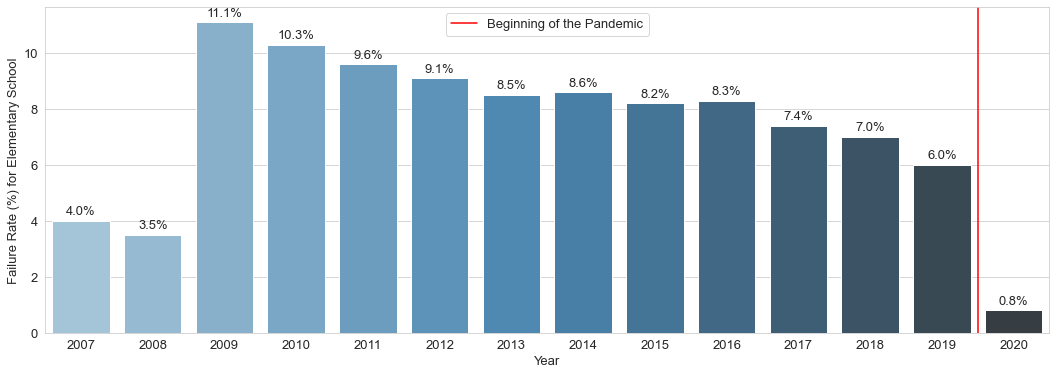

In [96]:
plt.figure(figsize=(18, 6))

# plt.subplot(1, 2, 1)
barplot = sns.barplot(x=fail_data['Ano'], y=fail_data['R_EF_Total'], palette="Blues_d")
printLabelsOnTop(barplot,0)

# ax.yaxis.set_major_formatter(tkr.FuncFormatter(formatador_de_milhares))
# plt.tight_layout()

plt.xlabel("Year")
plt.ylabel("Failure Rate (%) for Elementary School")
plt.axvline(x=12.5, label="Beginning of the Pandemic", color="red", linestyle='-')

plt.rcParams.update({'font.size': 13})

plt.legend()
plt.show()

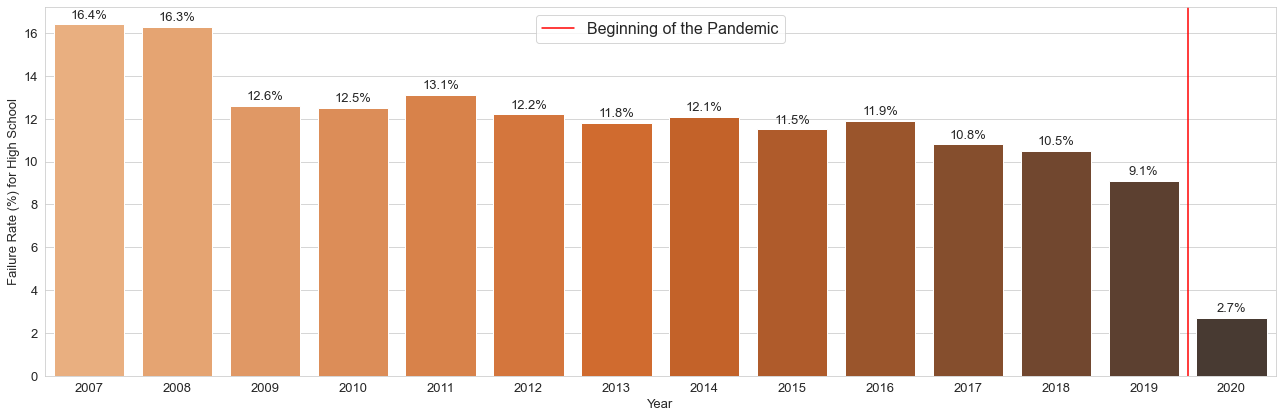

In [97]:
plt.figure(figsize=(18, 6))

# plt.subplot(1, 2, 1)
barplot = sns.barplot(x=fail_data['Ano'], y=fail_data['RTotal - EM'], palette="Oranges_d")

printLabelsOnTop(barplot,0) 

# ax.yaxis.set_major_formatter(tkr.FuncFormatter(formatador_de_milhares))
plt.tight_layout()

plt.xlabel("Year")
plt.ylabel("Failure Rate (%) for High School")

plt.axvline(x=12.5, label="Beginning of the Pandemic", color="red", linestyle='-')

plt.rcParams.update({'font.size': 16})

plt.legend()
plt.show()

### The mean Failure Rate (FR) for Elementary School (ES)

In [98]:
mean_FR_ES = fail_data[1:14]['R_EF_Total'].sum()/13
print(mean_FR_ES)

7.815384615384615


### The mean Failure Rate (FR) for High School (HS)

In [99]:
mean_FR_HS = fail_data[1:14]['RTotal - EM'].sum()/13
print(mean_FR_HS)

12.36923076923077


### Plotting visualizations for Failure Rate before and during the Pandemic (2007-2020)

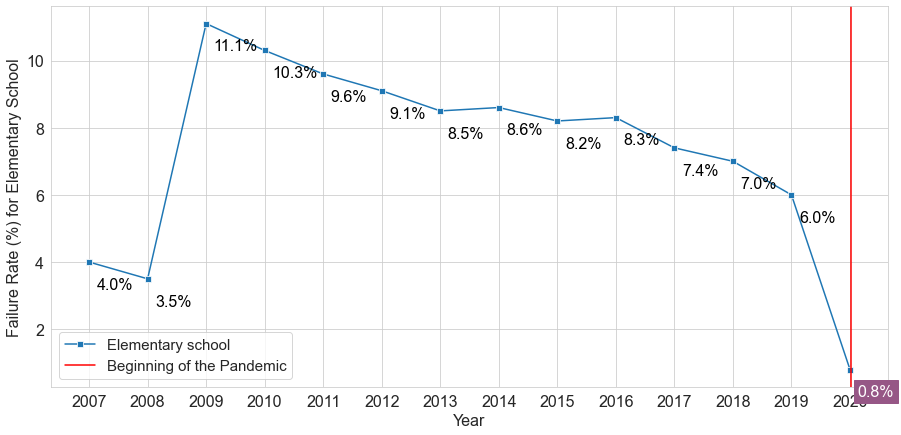

In [100]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,7))
# plt.title("Elementary School Approval Rate before and during the COVID-19 Pandemic")
ax = sns.lineplot(data=fail_data, x='Ano', y='R_EF_Total', label="Elementary school", marker='s')
ax.set(xticks=fail_data.Ano.values)
printLabelsOnLineplot(ax, fail_data, 'R_EF_Total')
plt.xlabel("Year")
plt.ylabel("Failure Rate (%) for Elementary School")
plt.axvline(x=2020.025, label="Beginning of the Pandemic", color="red", linestyle='-')
plt.rcParams.update({'font.size': 15})
plt.legend()
plt.show()

In [101]:
# sns.set_style("whitegrid")
# plt.figure(figsize=(15,7))
# plt.title("School Failure Rate before and during the COVID-19 Pandemic")
# ax = sns.regplot(data=fail_data, x='Ano', y='R_EF_Total', label="Elementary school")
# ax.set(xticks=fail_data.Ano.values)
# sns.regplot(data=fail_data, x='Ano', y='RTotal - EM', label="High school")

# y_2020_EM = fail_data[fail_data['Ano']==2020]['RTotal - EM'].iloc[0]
# plt.text(2020+x_2020_shift, y_2020_EM-y_2020_shift, '{:.1f}%'.format(y_2020_EM), color='white').set_backgroundcolor('#965786')
# y_2020_EF = fail_data[fail_data['Ano']==2020]['R_EF_Total'].iloc[0]
# plt.text(2020+x_2020_shift, y_2020_EF-y_2020_shift, '{:.1f}%'.format(y_2020_EF), color='white').set_backgroundcolor('#965786')

# plt.xlabel("Year")
# plt.ylabel("School Failure Rate (%)")
# plt.axvline(x=2020.025, label="Beginning of the Pandemic", color="red", linestyle='-')

# plt.rcParams.update({'font.size': 15})

# plt.legend()
# plt.show()

In [102]:
# sns.set_style("white")
# plt.figure(figsize=(15,7))
# sns.regplot(data=fail_data, x='Ano', y='R_EF_Total', label="Elementary School (ES)")
# ax = sns.regplot(data=fail_data, x='Ano', y='RTotal - EM', label="High School (HS)")
# ax.set(xticks=fail_data.Ano.values)
# plt.xlabel("Year")
# plt.ylabel("Failure Rate (%)")

# y_2020_EM = fail_data[fail_data['Ano']==2020]['RTotal - EM'].iloc[0]
# plt.text(2020+x_2020_shift, y_2020_EM-y_2020_shift, '{:.1f}%'.format(y_2020_EM), color='white').set_backgroundcolor('#965786')
# y_2020_EF = fail_data[fail_data['Ano']==2020]['R_EF_Total'].iloc[0]
# plt.text(2020+x_2020_shift, y_2020_EF-y_2020_shift, '{:.1f}%'.format(y_2020_EF), color='white').set_backgroundcolor('#965786')

# # plt.axhline(y=y_2020_EM, label="FR for ES during Pandemic", color='purple', linestyle='-')
# # plt.axhline(y=y_2020_EF, label="FR for HS during Pandemic", color='red', linestyle='-')


# plt.axhline(y=mean_FR_ES, label="Mean FR for ES before Pandemic", color='#00CD00', linestyle='-')
# plt.axhline(y=mean_FR_HS, label="Mean FR for HS before Pandemic", color='black', linestyle='-')

# plt.text(2020+x_2020_shift, mean_FR_ES-y_2020_shift, '{:.1f}%'.format(y_2020_EM), color='white').set_backgroundcolor('#965786')
# plt.text(2020+x_2020_shift, mean_FR_HS-y_2020_shift, '{:.1f}%'.format(y_2020_EF), color='white').set_backgroundcolor('#965786')

# plt.axvline(x=2020.025, label="Beginning of the Pandemic", color='red', linestyle='-')
# plt.title("Failure Rate before and during the COVID-19 Pandemic")

# plt.rcParams.update({'font.size': 15})

# plt.legend()
# plt.show()

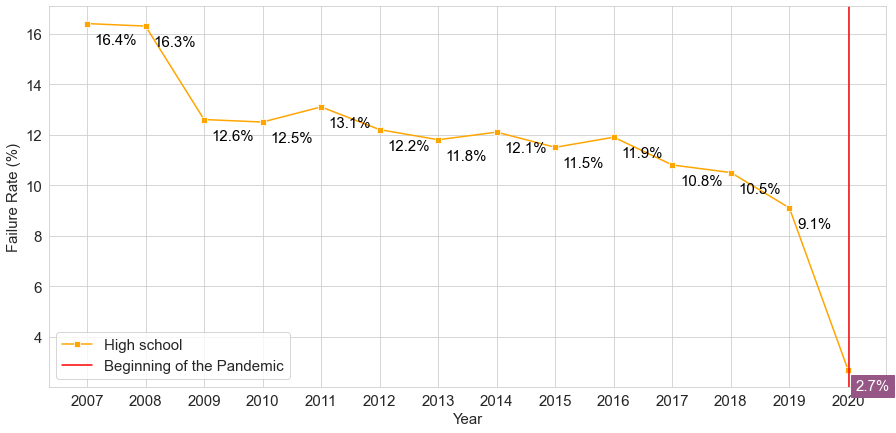

In [103]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,7))
# plt.title("Elementary School Approval Rate before and during the COVID-19 Pandemic")
ax = sns.lineplot(data=fail_data, x='Ano', y='RTotal - EM', label="High school", marker='s', color="orange")
ax.set(xticks=fail_data.Ano.values)
printLabelsOnLineplot(ax, fail_data, 'RTotal - EM')
plt.xlabel("Year")
plt.ylabel("Failure Rate (%)")
plt.axvline(x=2020.025, label="Beginning of the Pandemic", color="red", linestyle='-')
plt.rcParams.update({'font.size': 15})
plt.legend()
plt.show()

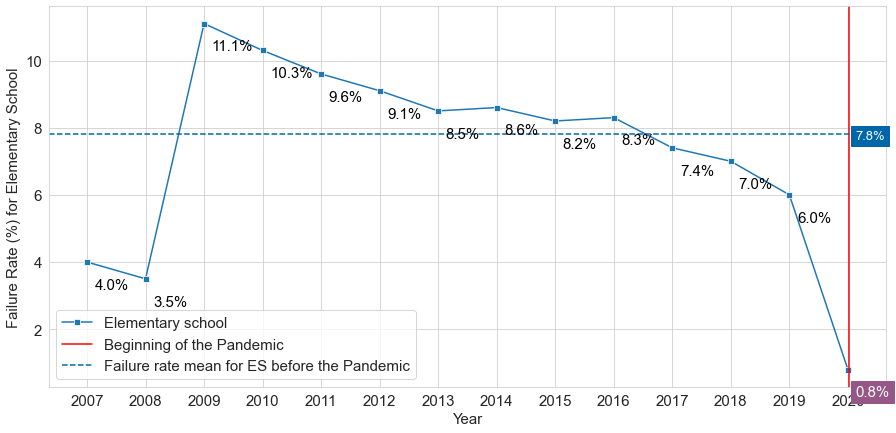

In [104]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,7))
# plt.title("Elementary School Approval Rate before and during the COVID-19 Pandemic")
ax = sns.lineplot(data=fail_data, x='Ano', y='R_EF_Total', label="Elementary school", marker='s')
ax.set(xticks=fail_data.Ano.values)
printLabelsOnLineplot(ax, fail_data, 'R_EF_Total')
plt.rcParams.update({'font.size': 13})
plt.xlabel("Year")
plt.ylabel("Failure Rate (%) for Elementary School")
plt.axvline(x=2020.025, label="Beginning of the Pandemic", color="red", linestyle='-')
plot_mean(fail_data, mean_FR_ES, 'Failure rate mean for ES before the Pandemic', 'white', '#0066aa')
plt.rcParams.update({'font.size': 15})
plt.legend()
plt.show()

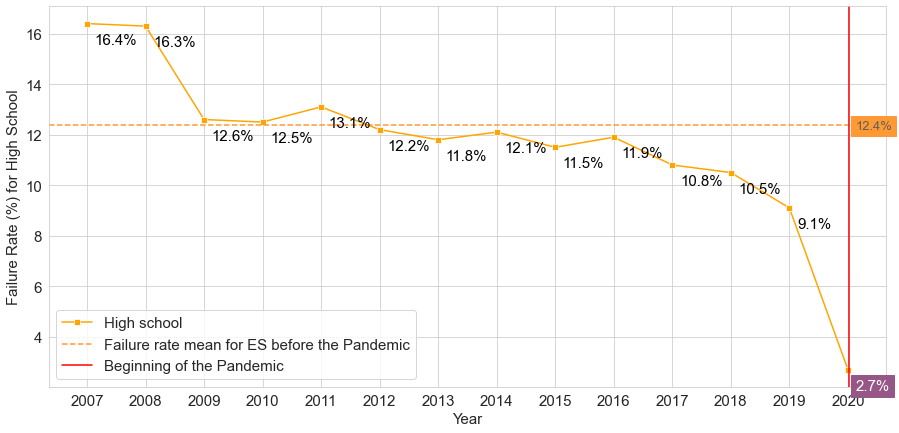

In [105]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,7))
# plt.title("Elementary School Approval Rate before and during the COVID-19 Pandemic")
ax = sns.lineplot(data=fail_data, x='Ano', y='RTotal - EM', label="High school", marker='s', color="orange")
ax.set(xticks=fail_data.Ano.values)
printLabelsOnLineplot(ax, fail_data, 'RTotal - EM')
plt.rcParams.update({'font.size': 13})
plot_mean(fail_data, mean_FR_HS, 'Failure rate mean for ES before the Pandemic', '#606060', '#ff9933')
plt.xlabel("Year")
plt.ylabel("Failure Rate (%) for High School")
plt.axvline(x=2020.025, label="Beginning of the Pandemic", color="red", linestyle='-')
plt.rcParams.update({'font.size': 15})
plt.legend()
plt.show()

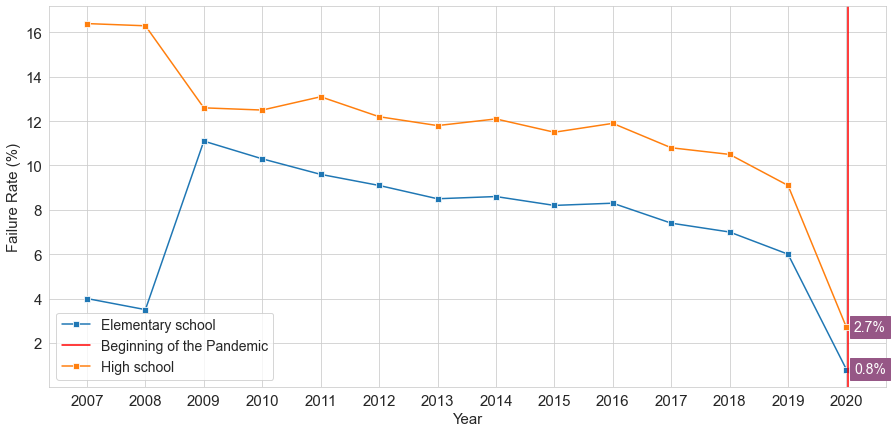

In [106]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,7))
ax_es = sns.lineplot(data=fail_data, x='Ano', y='R_EF_Total', label="Elementary school",marker='s')
ax_es.set(xticks=fail_data.Ano.values)
plt.rcParams.update({'font.size': 13})
plt.xlabel("Year")
plt.ylabel("Failure Rate (%)")
plt.axvline(x=2020.025, label="Beginning of the Pandemic", color="red", linestyle='-')
plt.rcParams.update({'font.size': 14})
ax_hs = sns.lineplot(data=fail_data, x='Ano', y='RTotal - EM', label="High school",marker='s')
ax_hs.set(xticks=fail_data.Ano.values)
plot_pandemic_value(fail_data, 'R_EF_Total')
plot_pandemic_value(fail_data, 'RTotal - EM')
plt.legend()
plt.show()

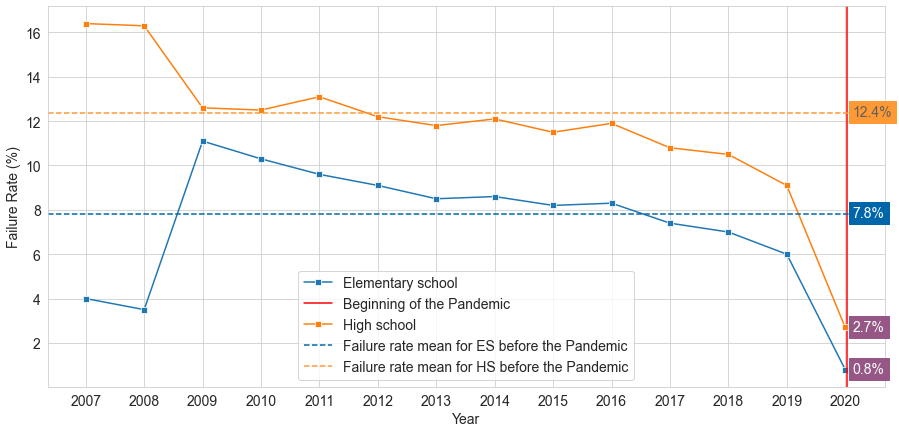

In [107]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,7))
ax_es = sns.lineplot(data=fail_data, x='Ano', y='R_EF_Total', label="Elementary school",marker='s')
ax_es.set(xticks=fail_data.Ano.values)
plt.rcParams.update({'font.size': 13})
plt.xlabel("Year")
plt.ylabel("Failure Rate (%)")
plt.axvline(x=2020.025, label="Beginning of the Pandemic", color="red", linestyle='-')
plt.rcParams.update({'font.size': 14})
ax_hs = sns.lineplot(data=fail_data, x='Ano', y='RTotal - EM', label="High school",marker='s')
ax_hs.set(xticks=fail_data.Ano.values)
plot_pandemic_value(fail_data, 'R_EF_Total')
plot_pandemic_value(fail_data, 'RTotal - EM')
plot_mean(fail_data, mean_FR_ES, 'Failure rate mean for ES before the Pandemic', 'white', '#0066aa')
plot_mean(fail_data, mean_FR_HS, 'Failure rate mean for HS before the Pandemic', '#606060', '#ff9933')
plt.legend()
plt.show()

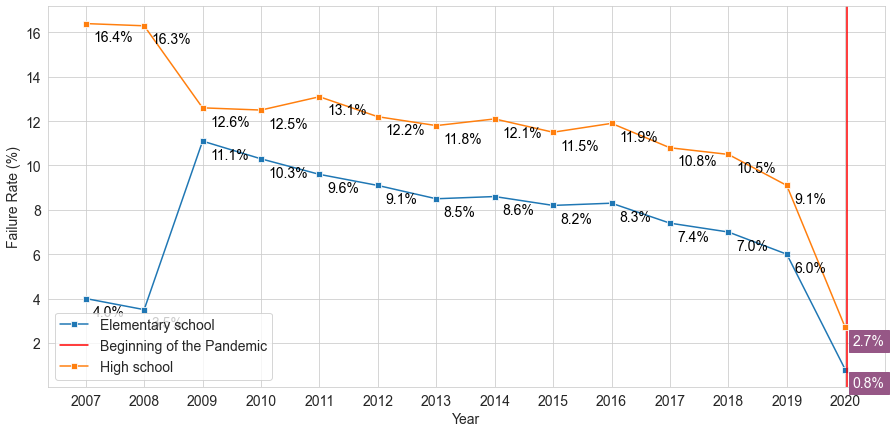

In [108]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,7))
ax_es = sns.lineplot(data=fail_data, x='Ano', y='R_EF_Total', label="Elementary school",marker='s')
ax_es.set(xticks=fail_data.Ano.values)
printLabelsOnLineplot(ax_es, fail_data, 'R_EF_Total')
plt.rcParams.update({'font.size': 13})
plt.xlabel("Year")
plt.ylabel("Failure Rate (%)")
plt.axvline(x=2020.025, label="Beginning of the Pandemic", color="red", linestyle='-')
plt.rcParams.update({'font.size': 14})
ax_hs = sns.lineplot(data=fail_data, x='Ano', y='RTotal - EM', label="High school",marker='s')
ax_hs.set(xticks=fail_data.Ano.values)
printLabelsOnLineplot(ax_hs, fail_data, 'RTotal - EM')
plt.legend()
plt.show()

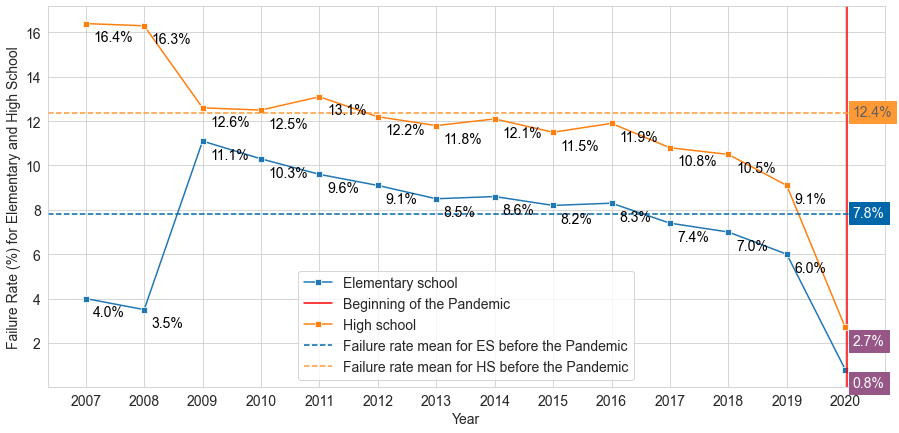

In [109]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,7))
ax_es = sns.lineplot(data=fail_data, x='Ano', y='R_EF_Total', label="Elementary school",marker='s')
ax_es.set(xticks=fail_data.Ano.values)
printLabelsOnLineplot(ax_es, fail_data, 'R_EF_Total')
plt.rcParams.update({'font.size': 13})
plt.xlabel("Year")
plt.ylabel("Failure Rate (%) for Elementary and High School")
plt.axvline(x=2020.025, label="Beginning of the Pandemic", color="red", linestyle='-')
plt.rcParams.update({'font.size': 14})
ax_hs = sns.lineplot(data=fail_data, x='Ano', y='RTotal - EM', label="High school",marker='s')
ax_hs.set(xticks=fail_data.Ano.values)
printLabelsOnLineplot(ax_hs, fail_data, 'RTotal - EM')
plot_mean(fail_data, mean_FR_ES, 'Failure rate mean for ES before the Pandemic', 'white', '#0066aa')
plot_mean(fail_data, mean_FR_HS, 'Failure rate mean for HS before the Pandemic', '#606060', '#ff9933')
plt.legend()
plt.show()

## Plotting bar plots for Failure Rate (ES and HS)

In [110]:

# data1 = pd.read_csv('data/EF_EM_rede_localizacao_total.csv')
fail_rate_analysis_rede_localizacao_total = pd.read_csv('data/fail_rate_analysis_rede_localizacao_total.csv')

fail_rate_analysis_rede_localizacao_total 


,Ano,Localização,Rede,R_EF_Total,R1EF,R2EF,R3EF,4REF,R5EF,R6EF,R7EF,R8EF,R9EF,RTotal - EM,R1EM,R2EM,R3EM,R4EM,RNão-Seriado
0,2020,Total,Total,0.8,0.4,0.5,0.7,0.5,0.7,1.0,1.1,1.0,1.1,2.7,3.2,2.1,2.6,6.3,6.1
1,2019,Total,Total,6.0,1.0,2.1,8.1,5.3,4.7,10.2,9.1,7.2,5.8,9.1,13.4,8.1,4.5,7.2,10.3
2,2018,Total,Total,7.0,1.2,2.2,9.4,6.3,5.6,11.7,10.5,8.4,6.9,10.5,15.4,9.4,5.4,7.6,13.9
3,2017,Total,Total,7.4,1.2,2.2,9.7,6.3,5.9,12.7,10.9,8.8,7.5,10.8,15.8,9.6,5.5,7.0,8.9
4,2016,Total,Total,8.3,1.3,2.5,10.7,7.2,6.8,14.0,12.1,10.2,8.6,11.9,17.3,10.7,6.0,7.3,9.2
5,2015,Total,Total,8.2,1.4,2.5,10.5,7.2,6.7,13.8,12.2,9.6,8.3,11.5,16.6,10.1,5.9,5.8,8.1
6,2014,Total,Total,8.6,1.5,2.9,11.1,7.6,7.0,14.6,12.4,10.3,8.9,12.1,17.0,11.0,6.4,6.4,8.3
7,2013,Total,Total,8.5,1.5,3.3,10.3,7.2,7.3,14.0,12.0,9.8,8.9,11.8,16.7,10.5,6.4,5.4,7.4
8,2012,Total,Total,9.1,1.9,5.1,11.1,7.8,7.5,14.6,12.5,10.0,9.5,12.2,16.8,11.1,6.9,4.7,7.4
9,2011,Total,Total,9.6,2.1,6.7,11.4,7.5,7.8,15.2,12.7,10.7,10.3,13.1,18.0,11.8,7.5,4.2,10.0


In [111]:
data_barplot_fail = fail_rate_analysis_rede_localizacao_total[['Ano','R_EF_Total', 'RTotal - EM']]
data_barplot_fail

,Ano,R_EF_Total,RTotal - EM
0,2020,0.8,2.7
1,2019,6.0,9.1
2,2018,7.0,10.5
3,2017,7.4,10.8
4,2016,8.3,11.9
5,2015,8.2,11.5
6,2014,8.6,12.1
7,2013,8.5,11.8
8,2012,9.1,12.2
9,2011,9.6,13.1


In [112]:
data_barplot_fail_es = data_barplot_fail[['Ano', 'R_EF_Total']].reset_index(drop=True)
data_barplot_fail_es['Level'] = 'Elementary School'
data_barplot_fail_es.rename(columns={'Ano': 'Year', 'R_EF_Total': 'Fail'}, inplace=True)
data_barplot_fail_es

,Year,Fail,Level
0,2020,0.8,Elementary School
1,2019,6.0,Elementary School
2,2018,7.0,Elementary School
3,2017,7.4,Elementary School
4,2016,8.3,Elementary School
5,2015,8.2,Elementary School
6,2014,8.6,Elementary School
7,2013,8.5,Elementary School
8,2012,9.1,Elementary School
9,2011,9.6,Elementary School


In [113]:
data_barplot_fail_hs = data_barplot_fail[['Ano', 'RTotal - EM']].reset_index(drop=True)
data_barplot_fail_hs['Level'] = 'High School'
data_barplot_fail_hs.rename(columns={'Ano': 'Year', 'RTotal - EM': 'Fail'}, inplace=True)
data_barplot_fail_hs

,Year,Fail,Level
0,2020,2.7,High School
1,2019,9.1,High School
2,2018,10.5,High School
3,2017,10.8,High School
4,2016,11.9,High School
5,2015,11.5,High School
6,2014,12.1,High School
7,2013,11.8,High School
8,2012,12.2,High School
9,2011,13.1,High School


In [114]:
data_barplot_fail_es_hs = pd.concat([data_barplot_fail_es, data_barplot_fail_hs])
data_barplot_fail_es_hs

,Year,Fail,Level
0,2020,0.8,Elementary School
1,2019,6.0,Elementary School
2,2018,7.0,Elementary School
3,2017,7.4,Elementary School
4,2016,8.3,Elementary School
5,2015,8.2,Elementary School
6,2014,8.6,Elementary School
7,2013,8.5,Elementary School
8,2012,9.1,Elementary School
9,2011,9.6,Elementary School


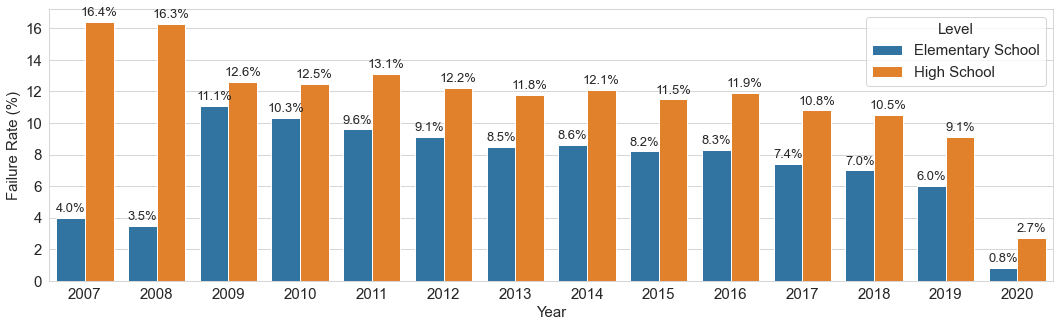

In [133]:
plt.figure(figsize=(18, 5))
barplot = ax = sns.barplot(x=data_barplot_fail_es_hs['Year'], y=data_barplot_fail_es_hs['Fail'], hue=data_barplot_fail_es_hs['Level'])
plt.rcParams.update({'font.size': 13})
printLabelsOnTop(barplot, 0)
plt.ylabel('Failure Rate (%)')
plt.show()